In [ ]:
# data 경로 : /content/drive/MyDrive/diabetes/diabetes.csv

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# seaborn scheme 로 세팅하고 font_scale 세팅.
plt.style.use('seaborn')
sns.set(font_scale=2.5) 

# 결측데이터를 파악하는데 직관적인 도움을 주는 패키지.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 브라우저에서 결과 바로 볼 수 있게 해줌.
%matplotlib inline

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/diabetes/diabetes.csv")

df = df_raw.copy()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


8개의 칼럼으로 해당 환자가 diabetes인지 아닌지 분류하는 분류문제이다.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치는 존재하지 않는다.

In [ ]:
# 먼저 결과 칼럼이 불균형 데이터인지 살펴봐야 한다.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

그렇게 불균형해보이지 않는다.

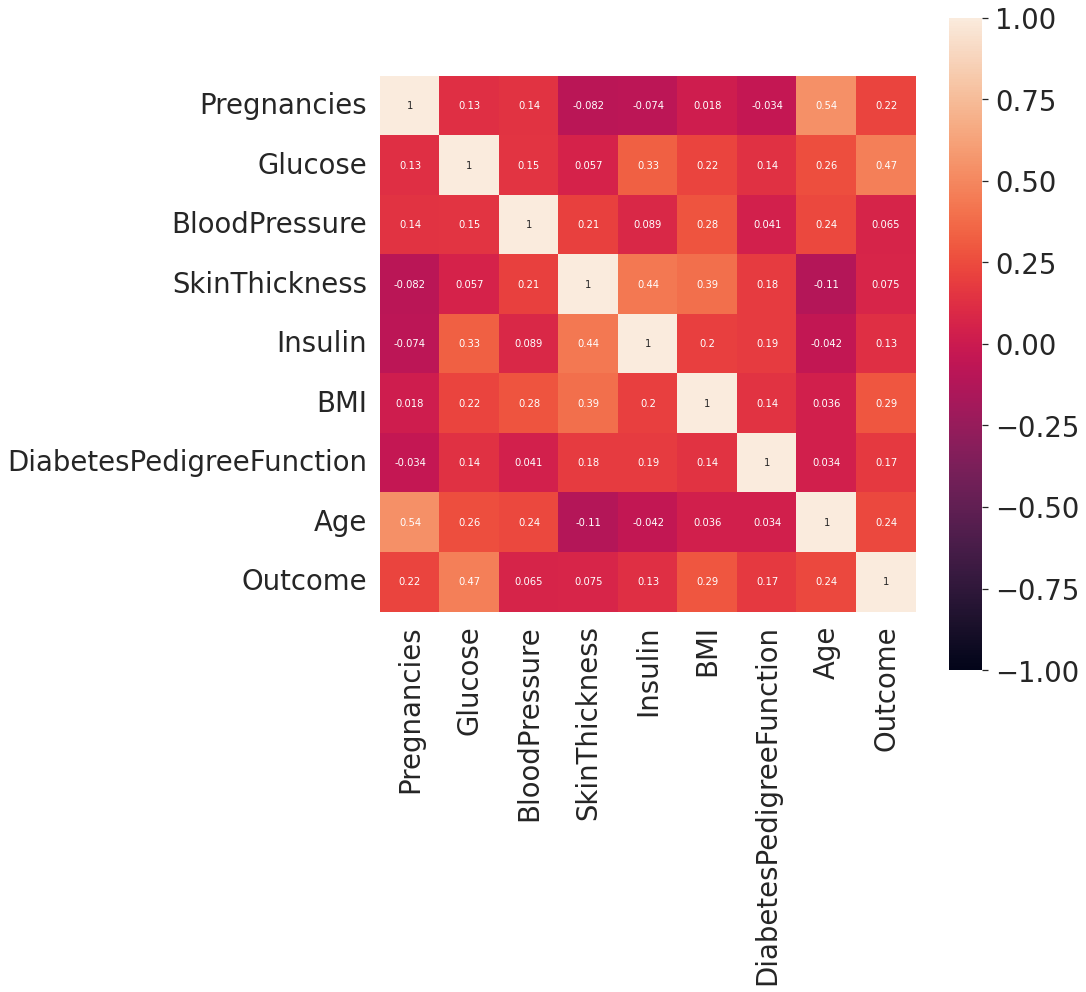

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(12,12))

sns.heatmap(corr, vmax=1, square = True, annot=True, vmin=-1)
plt.show()

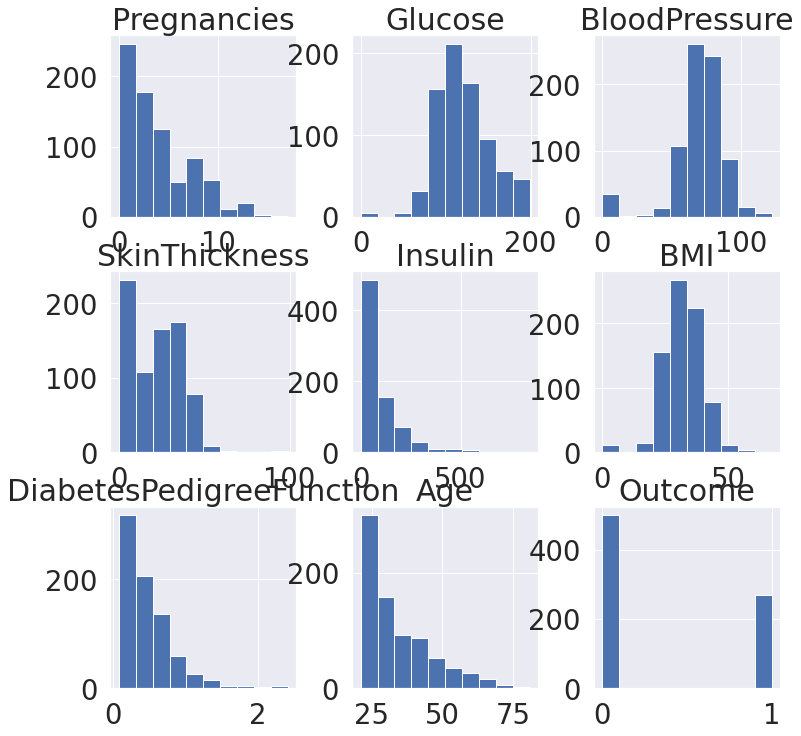

In [ ]:
df.hist(figsize=(12,12))
plt.show()

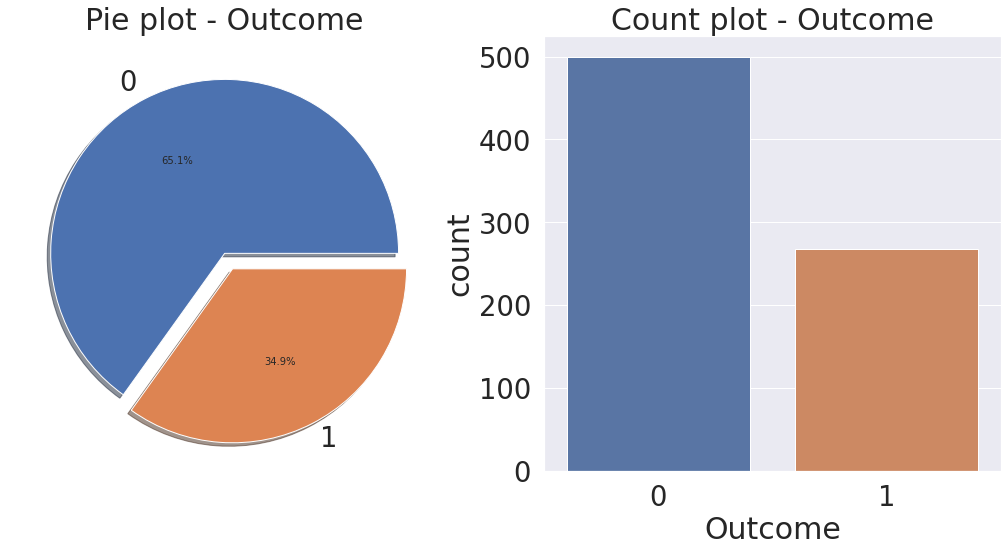

In [ ]:
# pie 그래프 혹은 countplot을 그려본다.
f, ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Outcome')
ax[0].set_ylabel('')

sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Count plot - Outcome')

plt.show()

당뇨병 환자라고 분류되어 있는 데이터는 전체의 34.9%에 달한다.

이제 칼럼 하나하나 뜯어서 살펴보자.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

1. Pregnancies

In [ ]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
pd.crosstab(df['Pregnancies'],df['Outcome'],margins=True)

Outcome,0,1,All
Pregnancies,,,
0,73,38,111
1,106,29,135
2,84,19,103
3,48,27,75
4,45,23,68
5,36,21,57
6,34,16,50
7,20,25,45
8,16,22,38


In [ ]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

2. Glucose

In [ ]:
df.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [ ]:
df.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

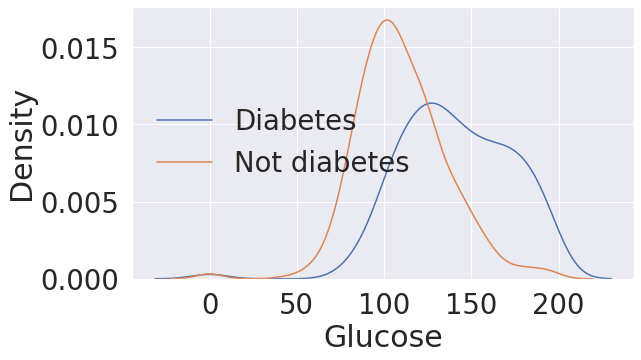

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['Glucose'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['Glucose'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()



당뇨병 걸린 사람들이 Glucose의 평균이 좀 더 높은 것을 볼 수 있다.

3. BloodPressure

In [ ]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

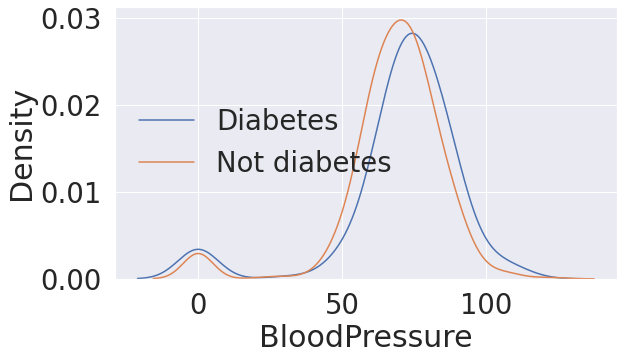

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['BloodPressure'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['BloodPressure'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()


4. SkinThickness

In [ ]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

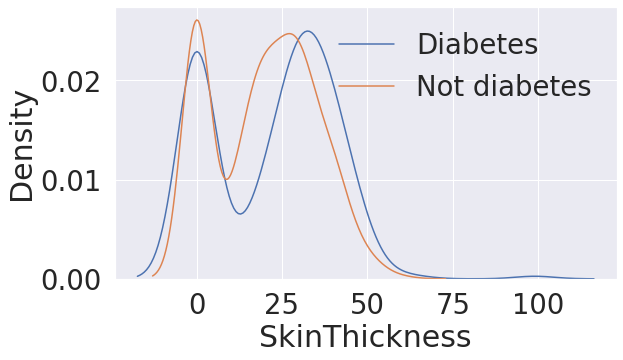

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['SkinThickness'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['SkinThickness'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()

5. Insulin

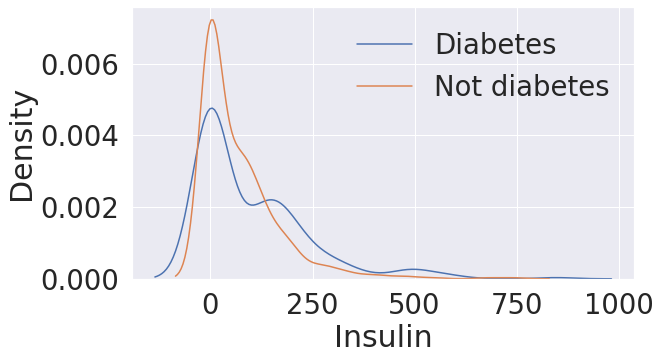

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['Insulin'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['Insulin'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()

6. BMI

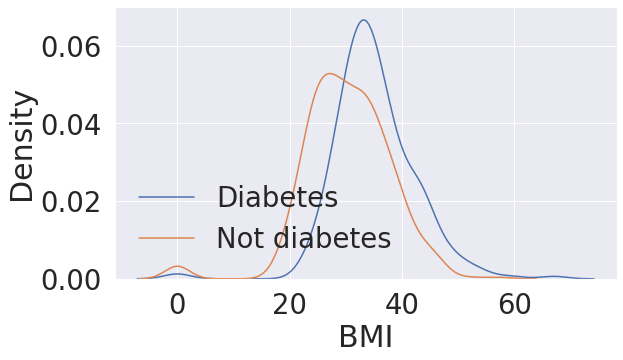

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['BMI'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['BMI'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()

7. DiabetesPedigreeFunction

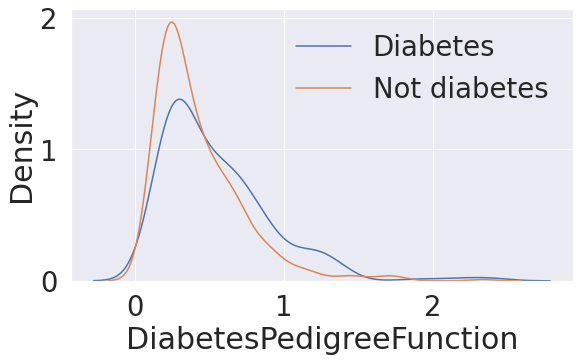

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['DiabetesPedigreeFunction'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['DiabetesPedigreeFunction'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()

8. Age

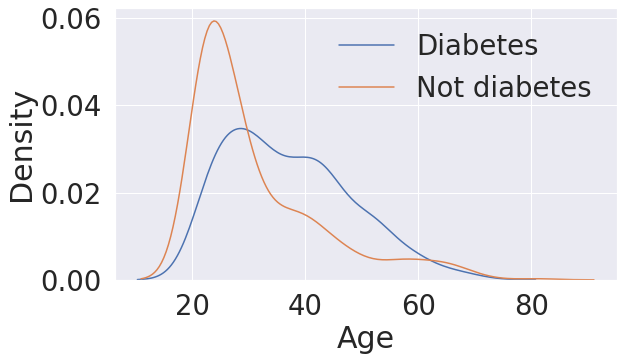

In [ ]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df[df['Outcome']==1]['Age'],ax=ax)
sns.kdeplot(df[df['Outcome']==0]['Age'],ax=ax)
plt.legend(['Diabetes','Not diabetes'])
plt.show()

## Feature engineering


In [ ]:
print('Glucose:',len(df[df['Glucose']==0]))
print('BloodPressure:',len(df[df['BloodPressure']==0]))
print('SkinThickness:',len(df[df['SkinThickness']==0]))
print('Insulin:',len(df[df['Insulin']==0]))
print('BMI:',len(df[df['BMI']==0]))

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [ ]:
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
621,621,2,92,76,20,0,24.2,1.698,28
128,128,1,117,88,24,145,34.5,0.403,40
57,57,0,100,88,60,110,46.8,0.962,31
341,341,1,95,74,21,73,25.9,0.673,36


In [ ]:
print('Glucose:',len(X_train[X_train['Glucose']==0]))
print('BloodPressure:',len(X_train[X_train['BloodPressure']==0]))
print('SkinThickness:',len(X_train[X_train['SkinThickness']==0]))
print('Insulin:',len(X_train[X_train['Insulin']==0]))
print('BMI:',len(X_train[X_train['BMI']==0]))

Glucose: 5
BloodPressure: 31
SkinThickness: 175
Insulin: 287
BMI: 9


In [ ]:
print('Glucose:',len(X_test[X_test['Glucose']==0]))
print('BloodPressure:',len(X_test[X_test['BloodPressure']==0]))
print('SkinThickness:',len(X_test[X_test['SkinThickness']==0]))
print('Insulin:',len(X_test[X_test['Insulin']==0]))
print('BMI:',len(X_test[X_test['BMI']==0]))

Glucose: 0
BloodPressure: 4
SkinThickness: 52
Insulin: 87
BMI: 2


결측치가 0으로 되어 있는 데이터들이 있다.

- glucose는 train 데이터에만 있어서 삭제.
- 나머지는 평균값으로 대체한다.



In [ ]:
# glucose 결측치 삭제
del_idx = X_train[X_train['Glucose']==0].index
del_idx


Int64Index([182, 75, 342, 502, 349], dtype='int64')

In [ ]:
X_train = X_train.drop(index=del_idx,axis=0)
y_train = y_train.drop(index=del_idx, axis=0)



In [ ]:
print('Glucose:',len(X_train[X_train['Glucose']==0]))
print('BloodPressure:',len(X_train[X_train['BloodPressure']==0]))
print('SkinThickness:',len(X_train[X_train['SkinThickness']==0]))
print('Insulin:',len(X_train[X_train['Insulin']==0]))
print('BMI:',len(X_train[X_train['BMI']==0]))

Glucose: 0
BloodPressure: 31
SkinThickness: 175
Insulin: 283
BMI: 9


In [ ]:
# 평균을 먼저 구한다.

bloodAvg = X_train['BloodPressure'].mean()
skinAvg = X_train['SkinThickness'].mean()
insAvg = X_train['Insulin'].mean()
bmiAvg =X_train['BMI'].mean()



In [ ]:
cols = ['BloodPressure','SkinThickness','Insulin','BMI']
cols_mean = X_train[cols].mean()
X_train[cols].replace(0,cols_mean)


,BloodPressure,SkinThickness,Insulin,BMI
147,64.0,35.00000,119.000000,30.5
344,72.0,20.91133,82.866995,36.8
390,66.0,29.00000,196.000000,32.0
150,74.0,50.00000,204.000000,37.4
132,64.0,37.00000,225.000000,34.5
...,...,...,...,...
621,76.0,20.00000,82.866995,24.2
128,88.0,24.00000,145.000000,34.5
57,88.0,60.00000,110.000000,46.8
341,74.0,21.00000,73.000000,25.9


In [ ]:
# 스케일링한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [ ]:
y_test.head()

,Outcome
258,0
220,1
438,0
130,1
730,1


In [ ]:
# ID 제외한다.
X_train = X_train.drop('id',axis=1)
X_test = X_test.drop('id',axis=1)
y_train = y_train.drop('id',axis=1)
y_test = y_test.drop('id',axis=1)

In [ ]:
# 유틸리티 함수 생성 (내가 작성한것 아님)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

In [ ]:
# 로지스틱 회귀로 학습 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88  9]
 [24 33]]
정확도: 0.7857, 정밀도: 0.7857, 재현율: 0.5789, F1: 0.6667, AUC:0.7431


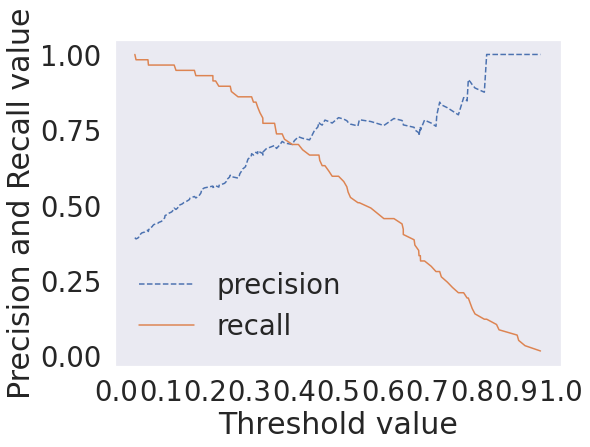

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
# 임계값을 변화시키면서 확인해보자.
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차행렬
[[72 25]
 [ 8 49]]
정확도: 0.7857, 정밀도: 0.6622, 재현율: 0.8596, F1: 0.7481, AUC:0.8010
임곗값: 0.33
오차행렬
[[77 20]
 [13 44]]
정확도: 0.7857, 정밀도: 0.6875, 재현율: 0.7719, F1: 0.7273, AUC:0.7829
임곗값: 0.36
오차행렬
[[78 19]
 [15 42]]
정확도: 0.7792, 정밀도: 0.6885, 재현율: 0.7368, F1: 0.7119, AUC:0.7705
임곗값: 0.39
오차행렬
[[80 17]
 [17 40]]
정확도: 0.7792, 정밀도: 0.7018, 재현율: 0.7018, F1: 0.7018, AUC:0.7632
임곗값: 0.42
오차행렬
[[82 15]
 [19 38]]
정확도: 0.7792, 정밀도: 0.7170, 재현율: 0.6667, F1: 0.6909, AUC:0.7560
임곗값: 0.45
오차행렬
[[85 12]
 [19 38]]
정확도: 0.7987, 정밀도: 0.7600, 재현율: 0.6667, F1: 0.7103, AUC:0.7715
임곗값: 0.48
오차행렬
[[87 10]
 [23 34]]
정확도: 0.7857, 정밀도: 0.7727, 재현율: 0.5965, F1: 0.6733, AUC:0.7467
임곗값: 0.5
오차행렬
[[88  9]
 [24 33]]
정확도: 0.7857, 정밀도: 0.7857, 재현율: 0.5789, F1: 0.6667, AUC:0.7431


In [ ]:
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬
[[87 10]
 [23 34]]
정확도: 0.7857, 정밀도: 0.7727, 재현율: 0.5965, F1: 0.6733, AUC:0.7467
